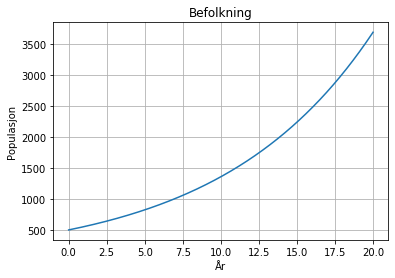

In [2]:
from pylab import *


innvandring = 0.1 # Befolkningen stiger med 10% på grunn av invandring og fødsel
t0 = 0 # Start år
start = 500 # Startsbefolkningen 

#Tidssteg
N = 100000
tid = 20 #Tid i år
dt = tid/(N-1)

#Matriser
t = zeros(N)
P = zeros(N)
Pder = zeros(N)

#Initierer matrisene
t[0] = t0
P[0] = start

#Eulers metode
for i in range (N-1):
    Pder[i] = innvandring * P[i] #Den deriverte av populasjonen på hvert steg
    P[i+1] = P[i] + Pder[i] * dt #Befolkningsantall på hvert steg
    t[i+1] = t[i] + dt #En verdi av tiden på hvert steg
    
#Plotting av graf
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()


1.03 = konstant pa hvor mange som blif født 

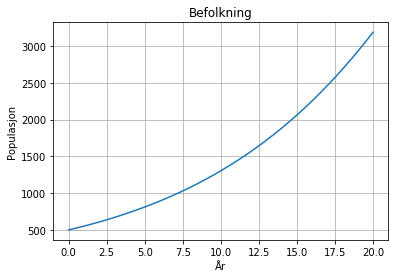

In [4]:
from pylab import *

innvandring = 0.1

t0 = 0
start = 500

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)

t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = innvandring * P[i] * (1-P[i]/20000) #Her har vi satt bærevnen på 20000 mennesker 
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

### Hvilke faktorer påvirker denne?
- Mat
- plass
- vann
På grunn av at det er en zombie apokalypse så er det svært lite tilgang på mat, trygge steder og rent vann. Derfor er bærevnen i Alexandria på 20000 mennesker 

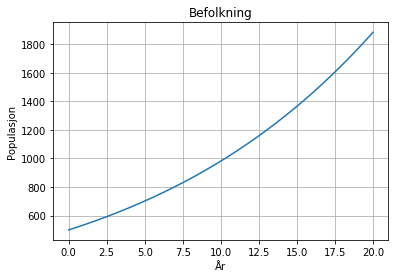

In [5]:
from pylab import *

innvandring = 0.1
død = 0.03 # 3% Av befolkningen dør hvert år 
t0 = 0
start = 500
vekst = innvandring - død #Her har vi lagt til død som en ny faktor til veksten på befolkningen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)


t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000)
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

Det er 1% som dør av alderdom, og 2% som dør av skader, sykdommer og mangel på medisiner hvert år. Tilsammen dør 3% av befolkningen hvert år. 


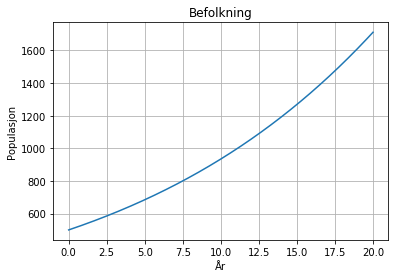

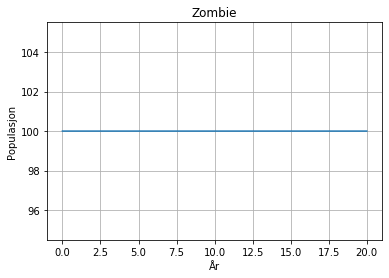

In [4]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100 #Antall zombier på starten
vekst = innvandring - death 
hyppigheten = 0.00005 #Hyppigheten av møter mellom zombier og mennesker 
zombie_vekst_før = 0 #zombie vekst før de kan smitte mennesker (konstant)


#Siden zombier dør ikke av sult, så har vi bestemt oss å ikke ta med justeringen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N) #Ny matrise for populasjonen av zombie
Pder = zeros(N)
Zder = zeros(N) #Ny matrise for den deriverte av zombie populasjonen

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie

#Eulers metode, modell med to arter
for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000) - hyppigheten * P[i] * Z[i]
    Zder[i] = zombie_vekst_før
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt
    t[i+1] = t[i] + dt 

    
#Her plotter vi Populasjon vekst
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Her plotter vi Zombie vekst
plot(t,Z)       
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

In [1]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100
vekst = innvandring - death 
hyppigheten = 0.0004 #Vi har forandret hyppighet fra 0.00005 til 0.0004 fordi den er mer realistisk 
zombie_vekst_før = 0 #Zombie vekst før de kan smitte mennesker

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N)
Pder = zeros(N)
Zder = zeros(N)
M = zeros(N) #Møter mellom mennesker og Zombie
Pu = zeros(N) #Populasjon av menneseker uten zombie
PuDer = zeros(N) #Den deriverte av populasjonveksten uten Zombie 

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie
M[0] = 0 #Møter mellom zombie og mennesker 
Pu[0] = start_mennesker 

for i in range (N-1):
    Pder[i] = vekst * P[i] * (1-P[i]/20000) - (hyppigheten * P[i] * Z[i])*0.2 #0.2 fordi det er 20% sjanse på at et menneske dør når den møter på en zombie
    Zder[i] = zombie_vekst_før + (M[i] * 0.3) # 0.3 fordi man har 30% sjanser på at man blir smitta når man møter på en zombie
    PuDer[i] = vekst * P[i] * (1-P[i]/20000) 
    M[i+1] =  (Pu[i] + PuDer[i] * dt) - (P[i] + Pder[i] * dt) #Møter mellom zombie er populasjonvekst uten zombie - populasjonvekst med Zombie
    Pu[i+1] = Pu[i] + PuDer[i] * dt 
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt 
    t[i+1] = t[i] + dt 

#Plotter befolkningsvekst
plot(t,P)     
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter Zombievekst
plot(t,Z)
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter møter mellom zombie og mennesker
plot(t,M)
grid()
title("Møter")
xlabel("År")
ylabel("Populasjon")
show()



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>